In [2]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

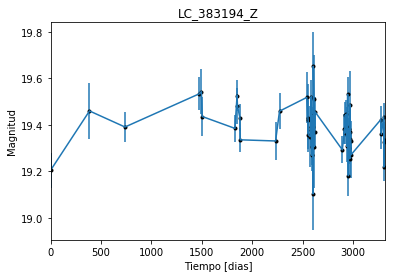

In [3]:
data = np.genfromtxt('LC_383194_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_383194_Z')
plt.savefig("LC_383194_Z.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

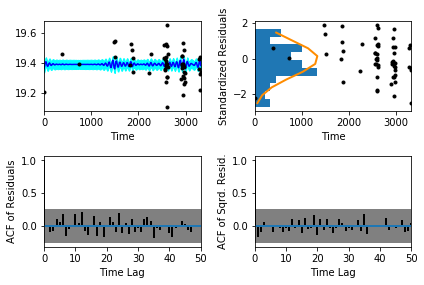

In [6]:
sample.assess_fit()

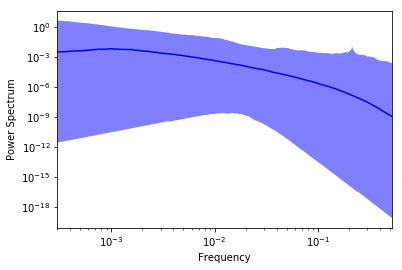

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

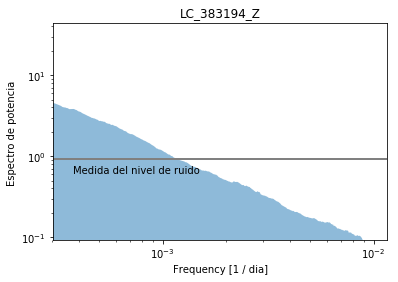

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_383194_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_383194_Z')

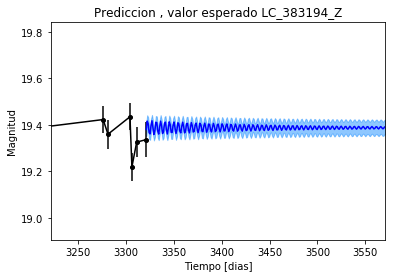

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_383194_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_383194_Z')

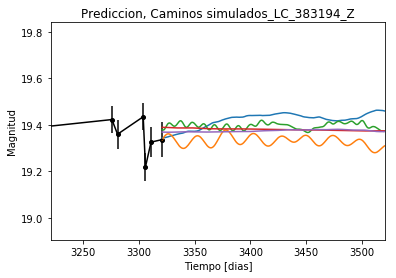

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_383194_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


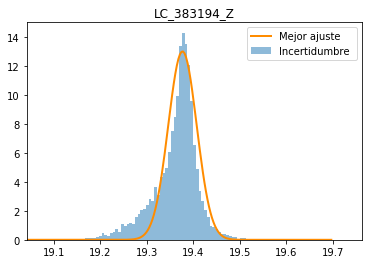

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_383194_Z')
plt.savefig("Mejor_ajuste_LC_383194_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_383194_Z')

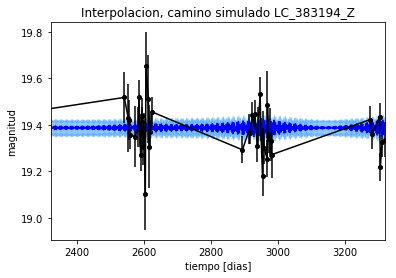

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_383194_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_383194_Z')

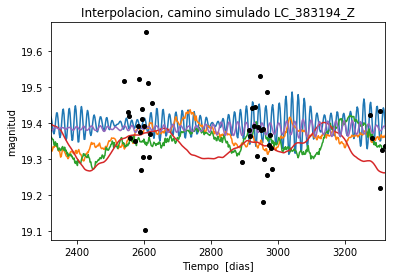

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_383194_Z')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 792.172108695
Median: 0.00681518814209
Standard deviation: 0.153077687216
68% credibility interval: [ 0.00072735  0.1090095 ]
95% credibility interval: [  3.36813485e-04   6.06887009e-01]
99% credibility interval: [  3.05962357e-04   9.50050183e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1214.41404115
Median: 0.00324152597528
Standard deviation: 0.101362687339
68% credibility interval: [ 0.00055753  0.05158367]
95% credibility interval: [ 0.00033283  0.32772966]
99% credibility interval: [  3.05962357e-04   6.83557800e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 2115.21563357
Median: 0.0222342944135
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 593.981183304
Median: 83.2567503558
Standard deviation: 1.38368234633
68% credibility interval: [ 81.75763421  84.10263623]
95% credibility interval: [ 79.40055907  84.64997708]
99% credibility interval: [ 77.41166786  85.86994767]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 612.576304622
Median: 0.722117876694
Standard deviation: 2.21114142556
68% credibility interval: [ 0.07396756  3.8225945 ]
95% credibility interval: [ 0.01386932  7.2959537 ]
99% credibility interval: [  9.69725125e-03   1.07671310e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 403.554828568
Median: 1.50069829407
Standard deviation: 12.3195309932
68% credibility interval: [  0.03777617  16.63888258]
95% credibility interval: [  2.

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 406.638476874
Median: 0.0149072253189
Standard deviation: 2.77469510186e+79
68% credibility interval: [  4.03964615e-66   8.06439009e+37]
95% credibility interval: [  1.52857466e-112   5.85617548e+067]
99% credibility interval: [  2.07000998e-121   4.98307030e+078]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3180.50113273
Median: 19.38363219
Standard deviation: 0.019907557226
68% credibility interval: [ 19.3687745   19.39749487]
95% credibility interval: [ 19.34315849  19.42128494]
99% credibility interval: [ 19.31370317  19.45110855]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 355.794076427
Median: 0.0961164772939
Standard deviation: 0.286016794209
68% credibility interval: [ 0.          0.57302647]
95% credibility interval: [ 0.          0.93616543]
99% credibility interval: [ 0.          1.01883693]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 355.794076427
Median: 0.0961164772939
Standard deviation: 0.286016794209
68% credibility interval: [ 0.          0.57302647]
95% credibility interval: [ 0.          0.93616543]
99% credibility interval: [ 0.          1.01883693]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 229.096268675
Median: 0.0
Standard deviation: 0.105442173793
68% credi

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 593.981183304
Median: 83.2567503558
Standard deviation: 1.38368234633
68% credibility interval: [ 81.75763421  84.10263623]
95% credibility interval: [ 79.40055907  84.64997708]
99% credibility interval: [ 77.41166786  85.86994767]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2432.4933878
Median: 0.00097578482492
Standard deviation: 0.0036824805765
68% credibility interval: [ 0.00010447  0.00347206]
95% credibility interval: [  3.80718788e-06   9.53208959e-03]
99% credibility interval: [  1.75370120e-07   1.88809048e-02]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2080.38454466
Median: 1.10392566291
Standard deviation: 0.172607748504
68% credibility interval: [ 0.95102155  1.28487415]
95% credibility interval: [ 0.82263236  1.4908231 ]
99% credibility interval: [ 0.74692572  1.65991361]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 973.611319156
Median: 1.72594343286e-07
Standard deviation: 0.44036104711
68% credibility interval: [  1.13792678e-40   2.89628360e-03]
95% credibility interval: [  9.07251122e-72   2.76582400e-01]
99% credibility interval: [  1.18183974e-81   1.07536127e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 792.172108695
Median: (-0.0428210900001-0.550716187379j)
Standard deviation: 2.03829460747
68% credibility interval: [-0.68492690-4.97600357j -0.00457006-0.07017424j]
95% credibility interval: [ -3.81318354e+00 -3.29118107e+00j  -2.11626154e-03 -8.86982229e-04j]
99% credibility interval: [ -5.96934135e+00-2.98438326j  -1.92241819e-03-3.65442273j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1214.41404115
Median: (-0.0203671083807+2.99746313741j)
Standard deviation: 1.90661289482
68% credibility interval: [-0.32410974+0.34436682j -0.00350304+0.j        ]
95% credibility interval: [-2.05918620+3.74778806j -0.00209123+0.j        ]
99% credibility interval: [ -4.29492033e+00+3.96334472j  -1.92241819e-03+3.65442273j]
Pos